In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Lecture du fichier CSV
df = pd.read_excel(
    '/content/drive/MyDrive/projet 2 /nov-22.xlsx',
    parse_dates=['activation_date']   # On indique la/les colonne(s) à convertir en date
)


# 2. Aperçu rapide des données
print(df.head())
print(df.info())


      co_id     activation_date  total_nb_recharge  total_rechage  \
0  39125204 2022-11-16 09:09:38                1.0            1.0   
1  39117975 2022-11-16 12:13:31                1.0            5.0   
2  40013993 2022-11-04 09:52:54                4.0            4.0   
3  38771650 2022-11-20 07:07:55                1.0            1.0   
4  38785077 2022-11-01 17:58:57               11.0           31.0   

   total_u_data  total_rev_option  total_rev_sos  total_u_out  total_u_in  \
0  5.217651e+06          0.798319            NaN       79.817       3.300   
1  5.916042e+04          3.781513            NaN        0.000      27.850   
2  2.445030e+04               NaN            NaN      143.167      65.817   
3  5.806141e+06               NaN            NaN      123.717       6.883   
4  1.270596e+07         23.613445            NaN      119.084     129.667   

   usage_op1  ...  usage_op3  nb_cont_out  nb_cont_in  nb_cell_visite_out  \
0        NaN  ...      7.400         15.0    

In [ ]:
df.head(24)

,co_id,activation_date,total_nb_recharge,total_rechage,total_u_data,total_rev_option,total_rev_sos,total_u_out,total_u_in,usage_op1,...,usage_op3,nb_cont_out,nb_cont_in,nb_cell_visite_out,nb_cell_visite_in,entity_code,entity_type_name,nbr_contrat,nbr_actif,flag_churn
0,39125204,2022-11-16 09:09:38,1.0,1.000,5.217651e+06,0.798319,NaN,79.817,3.300,NaN,...,7.400,15.0,6.0,5.0,6.0,TRA012,AGENCE TRADE,10.0,6.0,1
1,39117975,2022-11-16 12:13:31,1.0,5.000,5.916042e+04,3.781513,NaN,0.000,27.850,NaN,...,NaN,1.0,14.0,0.0,5.0,MON0104,AGENCE TRADE,4.0,2.0,0
2,40013993,2022-11-04 09:52:54,4.0,4.000,2.445030e+04,NaN,NaN,143.167,65.817,NaN,...,78.250,46.0,26.0,31.0,33.0,SOU0022F,FRANCHISE,2.0,2.0,0
3,38771650,2022-11-20 07:07:55,1.0,1.000,5.806141e+06,NaN,NaN,123.717,6.883,NaN,...,NaN,8.0,4.0,5.0,4.0,MON0104,AGENCE TRADE,15.0,3.0,0
4,38785077,2022-11-01 17:58:57,11.0,31.000,1.270596e+07,23.613445,NaN,119.084,129.667,NaN,...,55.117,19.0,23.0,12.0,22.0,MON0104,AGENCE TRADE,10.0,8.0,0
5,40107270,2022-11-11 12:07:32,1.0,5.000,3.092460e+03,NaN,NaN,125.067,15.383,NaN,...,66.267,26.0,13.0,13.0,6.0,AOU0032F,FRANCHISE,3.0,1.0,0
6,40137216,2022-11-16 14:36:25,1.0,26.000,1.274881e+06,18.907563,NaN,18.333,10.883,NaN,...,7.767,6.0,7.0,8.0,7.0,KRA0021F,FRANCHISE,1.0,1.0,0
7,39090375,2022-11-18 18:23:29,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,...,NaN,1.0,3.0,0.0,2.0,MON0104,AGENCE TRADE,83.0,18.0,1
8,38522173,2022-11-16 12:24:34,1.0,1.000,5.753219e+06,0.756302,NaN,8.832,0.350,NaN,...,3.400,10.0,8.0,2.0,4.0,MON0104,AGENCE TRADE,12.0,5.0,0
9,38792615,2022-11-06 09:42:06,9.0,17.000,4.620329e+06,6.428571,NaN,254.717,44.900,NaN,...,160.367,25.0,25.0,29.0,30.0,MON0104,AGENCE TRADE,1.0,1.0,1


In [ ]:
# 4.1. Mettre la colonne 'activation_date' en index
df.set_index('activation_date', inplace=True)

# 4.2. Créer une série temporelle agrégée par heure
#      L’opération "resample('H')" permet de regrouper les données par créneaux horaires.
#      On fait la somme de total_rechage dans chaque créneau.
ts = df['total_rechage'].resample('H').sum()

# 4.3. Affichage rapide
print(ts.head(24))  # Les 24 premières heures


<ipython-input-3-0c7a4935847b>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts = df['total_rechage'].resample('H').sum()


activation_date
2022-11-01 00:00:00     203.274000
2022-11-01 01:00:00      14.500000
2022-11-01 02:00:00     315.976000
2022-11-01 03:00:00     283.650000
2022-11-01 04:00:00     412.808000
2022-11-01 05:00:00     174.450000
2022-11-01 06:00:00      97.500000
2022-11-01 07:00:00     472.299001
2022-11-01 08:00:00    4911.596001
2022-11-01 09:00:00    7901.204008
2022-11-01 10:00:00    9288.034007
2022-11-01 11:00:00    8710.921009
2022-11-01 12:00:00    8510.554010
2022-11-01 13:00:00    7441.060009
2022-11-01 14:00:00    7638.965009
2022-11-01 15:00:00    8066.307008
2022-11-01 16:00:00    9288.800010
2022-11-01 17:00:00    7514.575010
2022-11-01 18:00:00    6558.924003
2022-11-01 19:00:00    3075.701002
2022-11-01 20:00:00    1258.606001
2022-11-01 21:00:00    1680.684002
2022-11-01 22:00:00    1354.202001
2022-11-01 23:00:00     541.764000
Freq: h, Name: total_rechage, dtype: float64


In [ ]:
ts.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 720 entries, 2022-11-01 00:00:00 to 2022-11-30 23:00:00
Freq: h
Series name: total_rechage
Non-Null Count  Dtype  
--------------  -----  
720 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


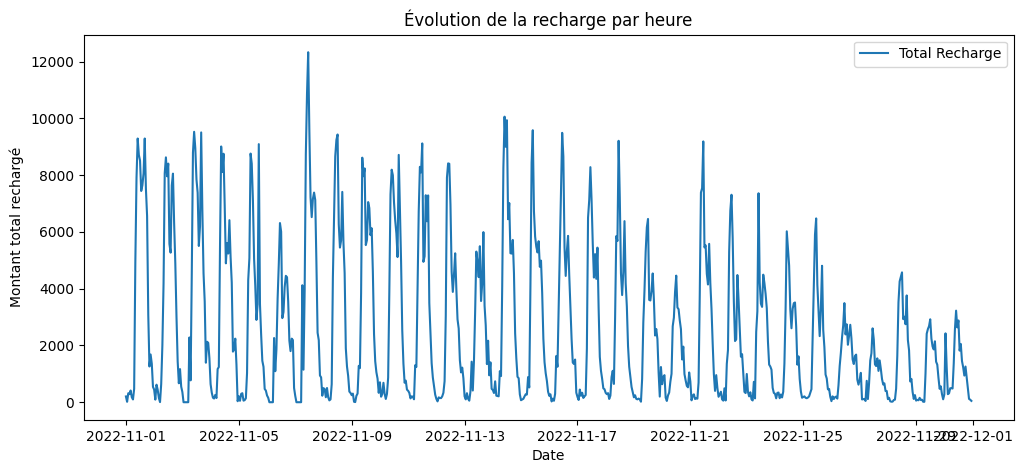

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(ts.index, ts.values, label='Total Recharge')
plt.title('Évolution de la recharge par heure')
plt.xlabel('Date')
plt.ylabel('Montant total rechargé')
plt.legend()
plt.show()


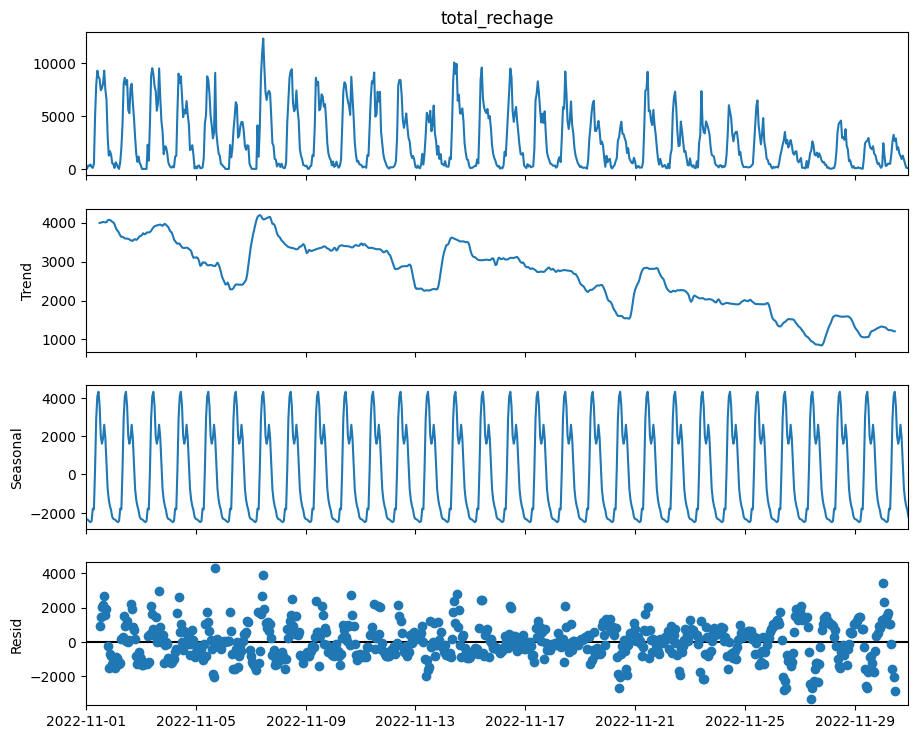

In [ ]:
decomposition = seasonal_decompose(ts, model='additive', period=24)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pour le test ADF et l'ACF/PACF
from statsmodels.tsa.stattools import adfuller, acf, pacf


In [ ]:
# Supposons que 'ts' soit votre série temporelle

# Test ADF
adf_result = adfuller(ts, autolag='AIC')
print("===== Test ADF sur la série d'origine =====")
print(f"Statistique de test : {adf_result[0]}")
print(f"P-value             : {adf_result[1]}")
for key, value in adf_result[4].items():
    print('Critère', key, ':', value)


===== Test ADF sur la série d'origine =====
Statistique de test : -2.9241528426198045
P-value             : 0.042610580244588414
Critère 1% : -3.439739809554328
Critère 5% : -2.86568368980381
Critère 10% : -2.5689766074363334


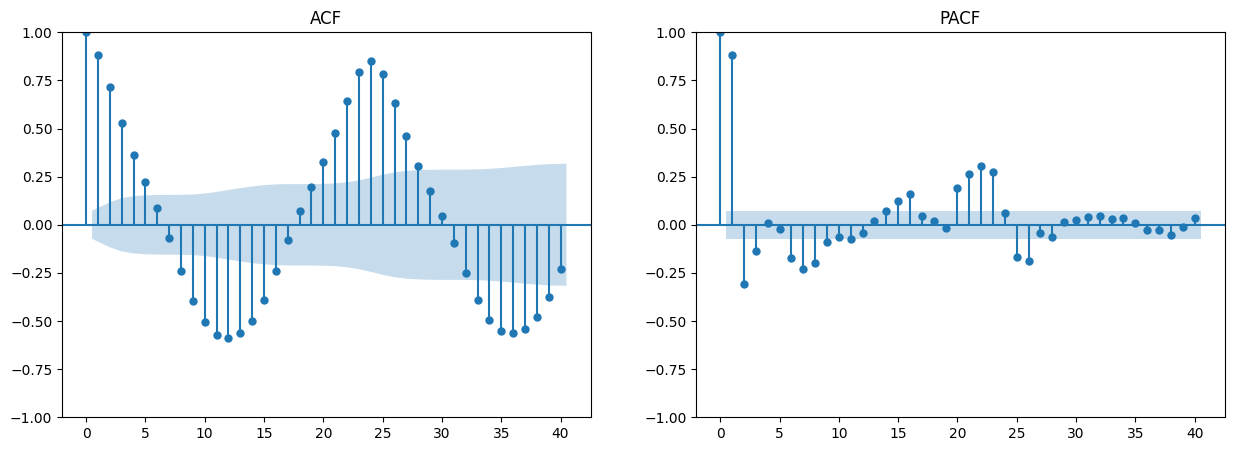

In [ ]:
import statsmodels.api as sm

fig, axes = plt.subplots(1, 2, figsize=(15,5))

sm.graphics.tsa.plot_acf(ts, lags=40, ax=axes[0])
axes[0].set_title('ACF')

sm.graphics.tsa.plot_pacf(ts, lags=40, ax=axes[1], method='ywm')
axes[1].set_title('PACF')

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Imaginons que votre série s'appelle 'ts' et couvre tout novembre
# On sépare par exemple les 25 premiers jours pour le train et le reste pour le test
split_date = '2022-11-25'
train = ts.loc[:split_date]
test = ts.loc[split_date:]


In [ ]:
pip install --upgrade scikit-learn


                                     SARIMAX Results                                      
Dep. Variable:                      total_rechage   No. Observations:                  600
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood               -4677.522
Date:                            Thu, 06 Feb 2025   AIC                           9365.044
Time:                                    19:53:16   BIC                           9386.807
Sample:                                11-01-2022   HQIC                          9373.533
                                     - 11-25-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8018      0.035     22.811      0.000       0.733       0.871
ma.L1         -0.4030      0.048   

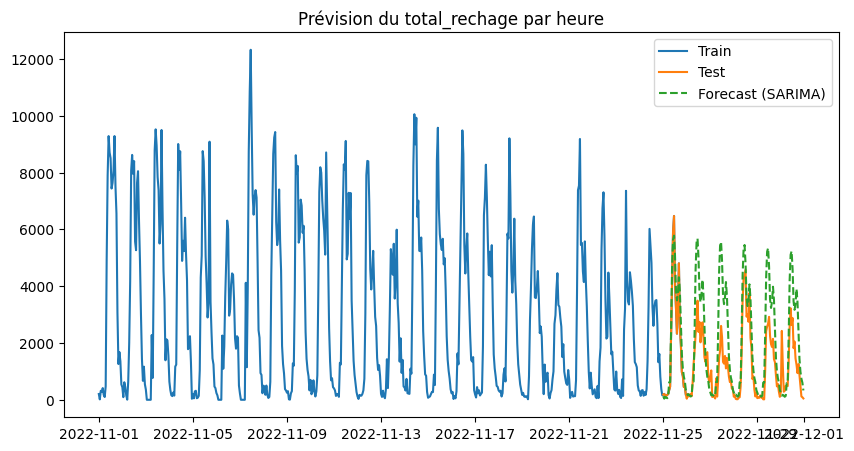

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    train,                # votre jeu d'entraînement
    order=(1, 0, 1),      # (p, d, q)
    seasonal_order=(1, 0, 1, 24),  # (P, D, Q, s) -> s=24 pour une saison journalière
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False)
print(results.summary())

# Prévoir sur le jeu de test
forecast = results.forecast(steps=len(test))
forecast.index = test.index

# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast (SARIMA)', linestyle='--')
plt.title('Prévision du total_rechage par heure')
plt.legend()
plt.show()


In [ ]:
# Évaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test, forecast)
# Calculate RMSE without 'squared' argument for older scikit-learn versions
rmse = np.sqrt(mean_squared_error(test, forecast))
print("MAE :", mae)
print("RMSE:", rmse)

MAE : 858.3820605489008
RMSE: 1216.2339865047513


In [ ]:
! pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.0 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

auto_model = pm.auto_arima(
    train,
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    seasonal=True, m=24,  # m=24 pour saisonnalité horaire
    start_P=0, max_P=2,
    start_Q=0, max_Q=2,
    d=0, D=0, max_d=1, max_D=1,  # On autorise un peu de différenciation
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
print(auto_model.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=11256.119, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=10113.060, Time=15.65 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=10535.564, Time=8.46 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=11682.150, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=10371.865, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,0)[24] intercept   : AIC=inf, Time=35.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=4.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[24] intercept   : AIC=10241.352, Time=2.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[24] intercept   : AIC=9927.500, Time=24.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,2)[24] intercept   : AIC=inf, Time=30.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,2)[24] intercept   : AIC=9968.528, Time=21.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=27.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,1)[24] intercept   : AIC=9972.692, Time=24.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,1)[24] intercept   : AIC=9990.335, Time=27.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,1)[24] intercept   : AIC=inf, Time=28.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,1)[24] intercept   : AIC=inf, Time=34.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[24]             : AIC=inf, Time=16.45 sec

Best model:  ARIMA(1,0,0)(2,0,1)[24] intercept
Total fit time: 301.232 seconds
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  600
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 24)   Log Likelihood               -4957.750
Date:                              Thu, 06 Feb 2025   AIC                           9927.500
Time:                                      19:58:28   BIC                           9953.882
Sample:                                  11-01-2022   HQIC                          9937.770
                                       - 11-25-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

                                      SARIMAX Results                                       
Dep. Variable:                        total_rechage   No. Observations:                  600
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 24)   Log Likelihood               -4501.340
Date:                              Thu, 06 Feb 2025   AIC                           9012.680
Time:                                      19:59:04   BIC                           9034.239
Sample:                                  11-01-2022   HQIC                          9021.104
                                       - 11-25-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5466      0.022     24.869      0.000       0.504       0.590
ar.S.L24       0.93

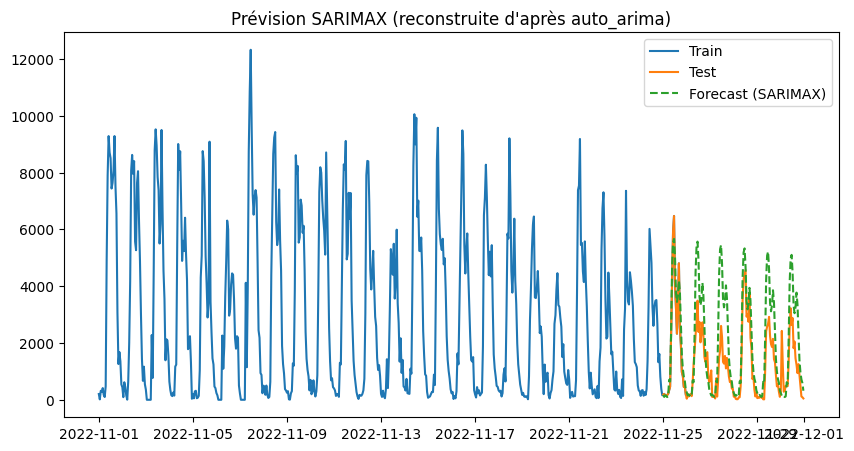

MAE (statsmodels): 814.4058576698566
RMSE (statsmodels): 1159.8016834125497


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# On reprend l'ordre trouvé par auto_arima
# (p, d, q) = (1, 0, 0)
# (P, D, Q, s) = (2, 0, 1, 24)

model_stats = SARIMAX(
    train,
    order=(1,0,0),
    seasonal_order=(2,0,1,24),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_stats = model_stats.fit(disp=False)
print(results_stats.summary())

# Prévision
forecast_stats = results_stats.forecast(steps=len(test))
forecast_stats.index = test.index

plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_stats.index, forecast_stats, label='Forecast (SARIMAX)', linestyle='--')
plt.legend()
plt.title("Prévision SARIMAX (reconstruite d'après auto_arima)")
plt.show()

# Métriques
mae_stats = mean_absolute_error(test, forecast_stats)
rmse_stats = np.sqrt(mean_squared_error(test, forecast_stats))
print("MAE (statsmodels):", mae_stats)
print("RMSE (statsmodels):", rmse_stats)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

param_list = [
    ((1,0,1),(1,0,1,24)),
    ((1,0,0),(2,0,1,24)),
    ((1,0,0),(1,0,1,24)),
    ((2,0,1),(2,0,1,24)),
    # Ajoutez d'autres tuples (p,d,q),(P,D,Q,s)
]

best_rmse = float('inf')
best_config = None

for (p,d,q), (P,D,Q,s) in param_list:
    try:
        model = SARIMAX(
            train,
            order=(p,d,q),
            seasonal_order=(P,D,Q,s),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        results = model.fit(disp=False)
        forecast = results.forecast(steps=len(test))
        forecast.index = test.index

        mae = mean_absolute_error(test, forecast)
        rmse = np.sqrt(mean_squared_error(test, forecast))

        print(f"Modèle SARIMAX({p},{d},{q})x({P},{D},{Q},{s}): MAE={mae:.2f}, RMSE={rmse:.2f}, AIC={results.aic:.2f}")

        if rmse < best_rmse:
            best_rmse = rmse
            best_config = (p,d,q,P,D,Q,s, mae, rmse)

    except Exception as e:
        print(f"Erreur pour le modèle SARIMAX({p},{d},{q})x({P},{D},{Q},{s}): {e}")

print("Meilleur modèle trouvé (selon RMSE) :", best_config)


Modèle SARIMAX(1,0,1)x(1,0,1,24): MAE=858.38, RMSE=1216.23, AIC=9365.04
Modèle SARIMAX(1,0,0)x(2,0,1,24): MAE=814.41, RMSE=1159.80, AIC=9012.68
Modèle SARIMAX(1,0,0)x(1,0,1,24): MAE=869.50, RMSE=1244.23, AIC=9418.99


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Modèle SARIMAX(2,0,1)x(2,0,1,24): MAE=792.54, RMSE=1133.10, AIC=8976.88
Meilleur modèle trouvé (selon RMSE) : (2, 0, 1, 2, 0, 1, 24, 792.5405524033131, 1133.1041147000587)


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                      total_rechage   No. Observations:                  600
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 24)   Log Likelihood               -4481.442
Date:                            Thu, 06 Feb 2025   AIC                           8976.884
Time:                                    20:00:01   BIC                           9007.053
Sample:                                11-01-2022   HQIC                          8988.673
                                     - 11-25-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0265      0.164      6.258      0.000       0.705       1.348
ar.L2         -0.1550      0.099   

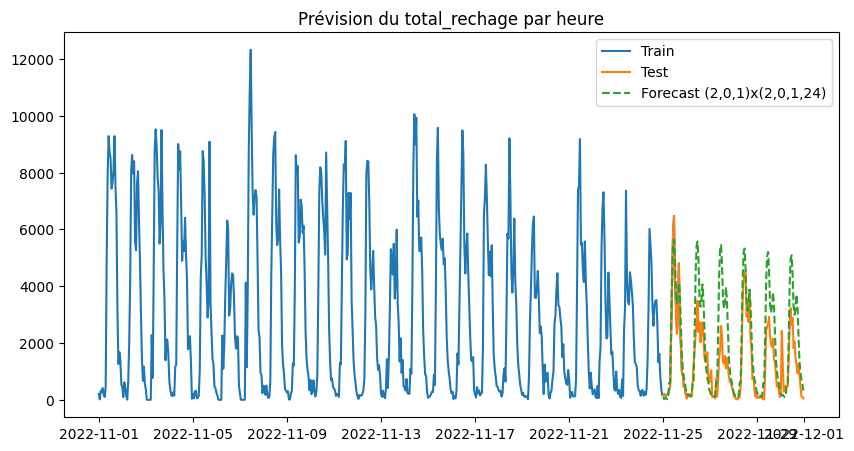

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Modèle
model_2_0_1 = SARIMAX(
    train,
    order=(2,0,1),
    seasonal_order=(2,0,1,24),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results_2_0_1 = model_2_0_1.fit(disp=False)

print(results_2_0_1.summary())

# Prévision
forecast_2_0_1 = results_2_0_1.forecast(steps=len(test))
forecast_2_0_1.index = test.index

# Évaluation
mae_2_0_1 = mean_absolute_error(test, forecast_2_0_1)
rmse_2_0_1 = np.sqrt(mean_squared_error(test, forecast_2_0_1))

print("MAE :", mae_2_0_1)
print("RMSE:", rmse_2_0_1)

# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_2_0_1.index, forecast_2_0_1, label='Forecast (2,0,1)x(2,0,1,24)', linestyle='--')
plt.title('Prévision du total_rechage par heure')
plt.legend()
plt.show()


In [ ]:
# 1) Essayer un solveur différent et plus d'itérations
model = SARIMAX(
    train,
    order=(2,0,1),
    seasonal_order=(2,0,1,24),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(method='powell', maxiter=1000, disp=True)
print(results.summary())

# 2) Vérifier si la RMSE est stable
forecast = results.forecast(steps=len(test))
forecast.index = test.index
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE (powell) :", rmse)


Optimization terminated successfully.
         Current function value: 7.487171
         Iterations: 4
         Function evaluations: 277
                                     SARIMAX Results                                      
Dep. Variable:                      total_rechage   No. Observations:                  600
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 24)   Log Likelihood               -4492.302
Date:                            Thu, 06 Feb 2025   AIC                           8998.605
Time:                                    20:00:11   BIC                           9028.774
Sample:                                11-01-2022   HQIC                          9010.394
                                     - 11-25-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

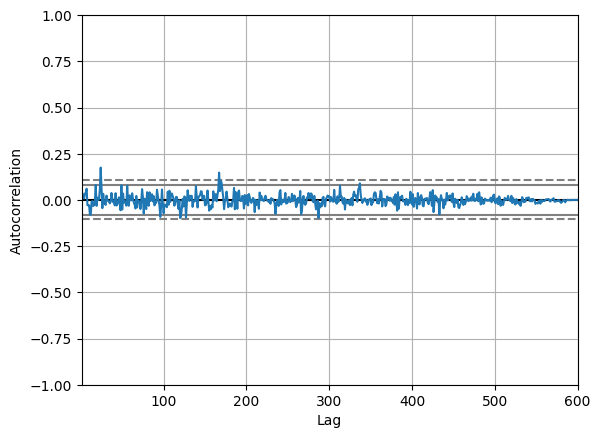

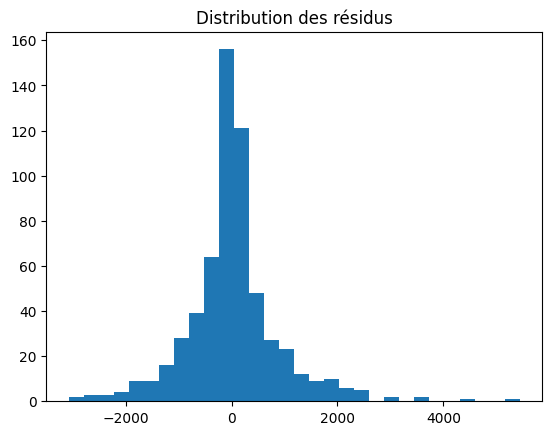

In [ ]:
residuals = results.resid
pd.plotting.autocorrelation_plot(residuals)
plt.show()
plt.hist(residuals, bins=30)
plt.title("Distribution des résidus")
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Supposez que 'train' et 'test' soient déjà définis
# On teste un SARIMAX(2,0,1)x(2,1,1,24)
model = SARIMAX(
    train,
    order=(2,0,1),             # p=2, d=0, q=1
    seasonal_order=(2,1,1,24), # P=2, D=1, Q=1, s=24
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(method='powell', maxiter=1000, disp=True)
print(results.summary())

# Prévision
forecast = results.forecast(steps=len(test))
forecast.index = test.index

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("MAE (avec D=1):", mae)
print("RMSE (avec D=1):", rmse)
print("AIC (avec D=1):", results.aic)


Optimization terminated successfully.
         Current function value: 7.175434
         Iterations: 6
         Function evaluations: 425
                                     SARIMAX Results                                      
Dep. Variable:                      total_rechage   No. Observations:                  600
Model:             SARIMAX(2, 0, 1)x(2, 1, 1, 24)   Log Likelihood               -4305.260
Date:                            Thu, 06 Feb 2025   AIC                           8624.520
Time:                                    20:00:47   BIC                           8654.377
Sample:                                11-01-2022   HQIC                          8636.211
                                     - 11-25-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

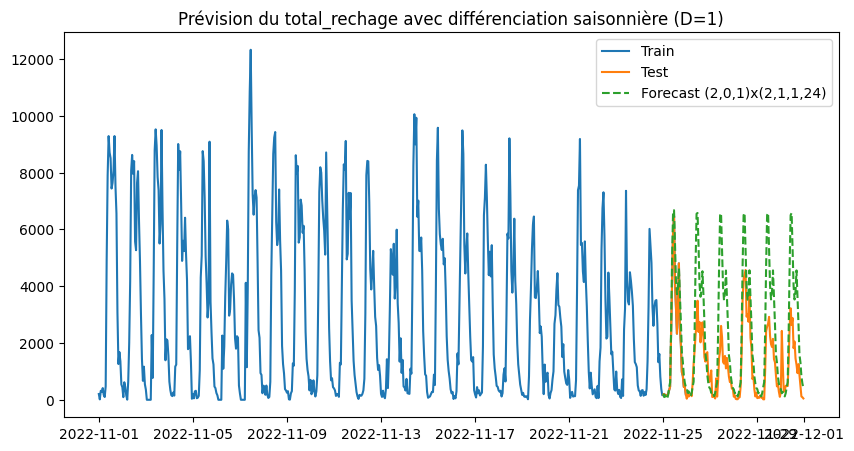

In [ ]:
# Visualisation
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast (2,0,1)x(2,1,1,24)', linestyle='--')
plt.title("Prévision du total_rechage avec différenciation saisonnière (D=1)")
plt.legend()
plt.show()

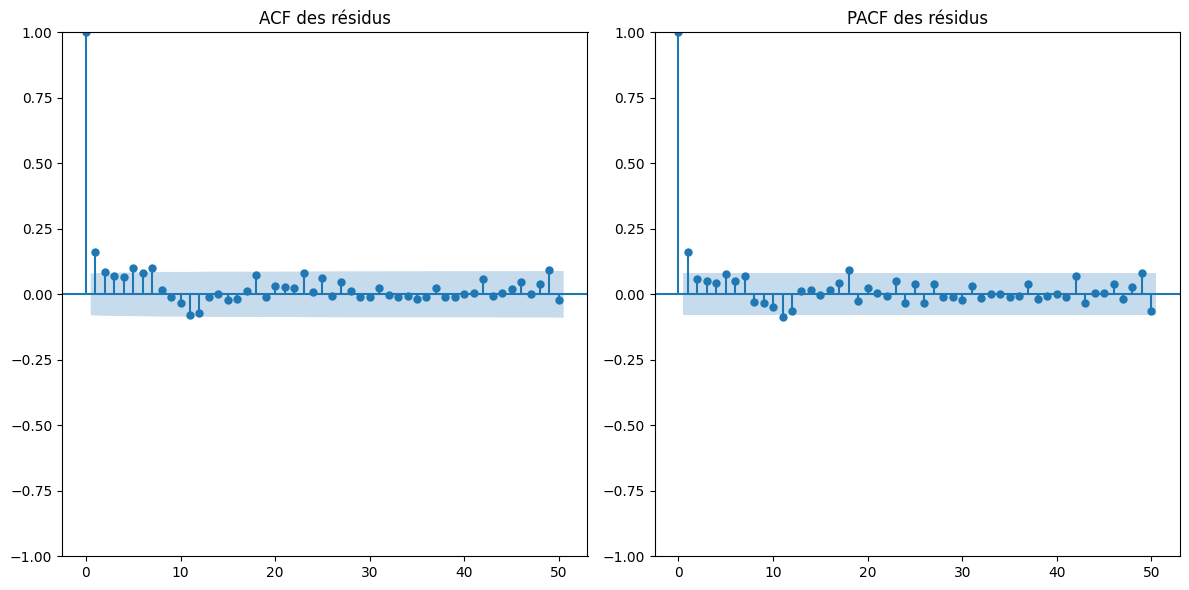

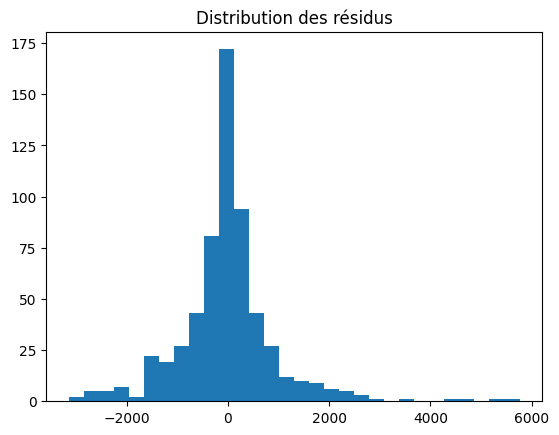

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IMPORTANT : on importe plot_acf et plot_pacf ici
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# On suppose que vous avez déjà construit votre modèle, par exemple :
# model = SARIMAX(train, order=(2,0,1), seasonal_order=(2,1,1,24), ...)
# results = model.fit(...)

residuals = results.resid

plt.figure(figsize=(12,6))

# ACF
plt.subplot(1,2,1)
plot_acf(residuals, ax=plt.gca(), lags=50)
plt.title("ACF des résidus")

# PACF
plt.subplot(1,2,2)
plot_pacf(residuals, ax=plt.gca(), lags=50, method='ywm')
plt.title("PACF des résidus")

plt.tight_layout()
plt.show()

# Histogramme des résidus
plt.hist(residuals, bins=30)
plt.title("Distribution des résidus")
plt.show()


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/projet 2 /nov-22.xlsx', parse_dates=['activation_date'])
df.set_index('activation_date', inplace=True)

# ex: la variable exogène
df['total_nb_recharge'] = df['total_nb_recharge'].fillna(0)

# resample horaire
ts = df['total_rechage'].resample('H').sum().fillna(0)
exog_full = df['total_nb_recharge'].resample('H').sum().fillna(0)

print(ts.head())
print(exog_full.head())


activation_date
2022-11-01 00:00:00    203.274
2022-11-01 01:00:00     14.500
2022-11-01 02:00:00    315.976
2022-11-01 03:00:00    283.650
2022-11-01 04:00:00    412.808
Freq: h, Name: total_rechage, dtype: float64
activation_date
2022-11-01 00:00:00    29.0
2022-11-01 01:00:00     3.0
2022-11-01 02:00:00    36.0
2022-11-01 03:00:00    80.0
2022-11-01 04:00:00    74.0
Freq: h, Name: total_nb_recharge, dtype: float64


<ipython-input-24-dccb09ca81ef>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts = df['total_rechage'].resample('H').sum().fillna(0)
<ipython-input-24-dccb09ca81ef>:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  exog_full = df['total_nb_recharge'].resample('H').sum().fillna(0)


In [ ]:
split_date = '2022-11-25'
train = ts.loc[:split_date]
test = ts.loc[split_date:]

exog_train = exog_full.loc[:split_date]
exog_test = exog_full.loc[split_date:]


In [ ]:
model = SARIMAX(train, order=(2,0,1), seasonal_order=(2,0,1,24))


In [ ]:
model_exog = SARIMAX(
    train,
    exog=exog_train,  # on ajoute la variable exogène
    order=(2,0,1),
    seasonal_order=(2,0,1,24),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_exog = model_exog.fit(method='powell', maxiter=1000, disp=True)
print(results_exog.summary())


Optimization terminated successfully.
         Current function value: 6.836116
         Iterations: 7
         Function evaluations: 536
                                     SARIMAX Results                                      
Dep. Variable:                      total_rechage   No. Observations:                  600
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 24)   Log Likelihood               -4101.670
Date:                            Thu, 06 Feb 2025   AIC                           8219.339
Time:                                    20:02:13   BIC                           8253.819
Sample:                                11-01-2022   HQIC                          8232.813
                                     - 11-25-2022                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

In [ ]:
forecast_exog = results_exog.forecast(steps=len(test), exog=exog_test)
forecast_exog.index = test.index

# Évaluation
mae_exog = mean_absolute_error(test, forecast_exog)
rmse_exog = np.sqrt(mean_squared_error(test, forecast_exog))
print("MAE (avec exog):", mae_exog)
print("RMSE (avec exog):", rmse_exog)
print("AIC (avec exog):", results_exog.aic)


MAE (avec exog): 294.99767705991763
RMSE (avec exog): 392.3046948789387
AIC (avec exog): 8219.33943376541


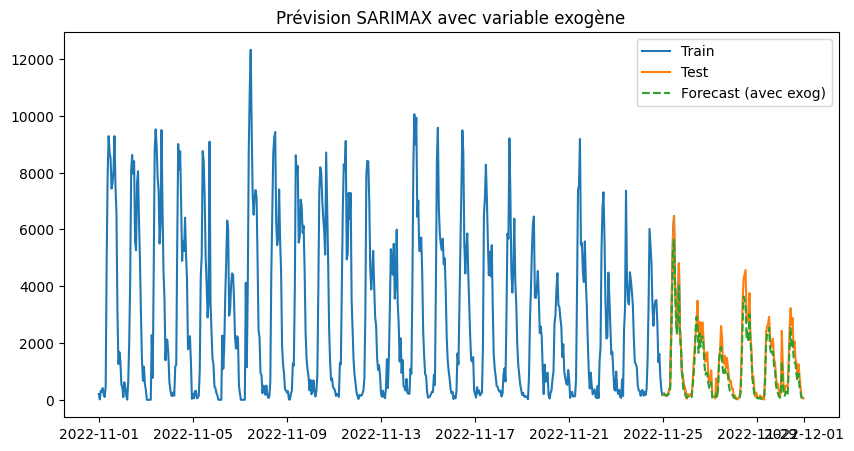

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast_exog.index, forecast_exog, linestyle='--', label='Forecast (avec exog)')
plt.legend()
plt.title("Prévision SARIMAX avec variable exogène")
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbd6sxz78/1g1ipcts.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbd6sxz78/kgrldjcn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77407', 'data', 'file=/tmp/tmpbd6sxz78/1g1ipcts.json', 'init=/tmp/tmpbd6sxz78/kgrldjcn.json', 'output', 'file=/tmp/tmpbd6sxz78/prophet_modelbxy9gwe8/prophet_model-20250206200215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:02:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:02:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


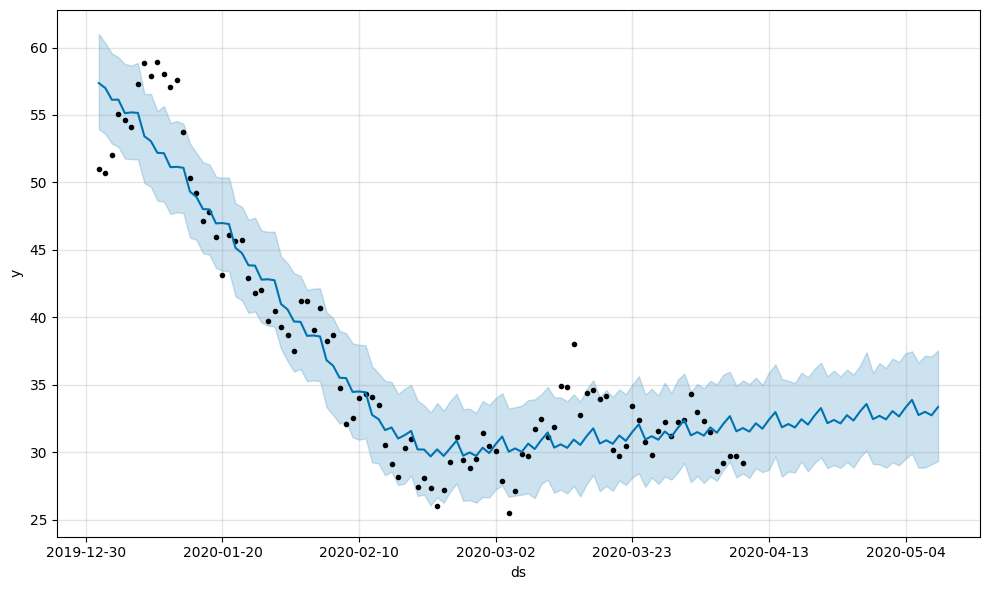

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Génération de données synthétiques
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=100, freq='D')
values = np.cumsum(np.random.randn(100) * 2) + 50  # Tendance aléatoire

# Création du DataFrame pour Prophet
df = pd.DataFrame({'ds': dates, 'y': values})

# Initialisation du modèle Prophet
model = Prophet(daily_seasonality=True)

# Ajustement du modèle aux données
model.fit(df)

# Création d'une période future de 30 jours
future = model.make_future_dataframe(periods=30)

# Prédiction
forecast = model.predict(future)

# Visualisation des résultats
fig = model.plot(forecast)
plt.show()


In [ ]:
split_date = '2022-11-25'
train = ts.loc[:split_date]
test = ts.loc[split_date:]

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Supposez que 'train' et 'test' soient déjà définis sous forme de DataFrames avec une colonne 'ds' (date) et 'y' (valeur)
# Application d'une différenciation saisonnière (D=1) comme dans SARIMA
s = 24  # Saison de 24 périodes (par exemple, pour des données horaires)
train['y'] = train['y'] - train['y'].shift(s)  # Différenciation saisonnière
train = train.dropna()  # Suppression des valeurs NaN créées par le décalage

# Initialisation du modèle Prophet
model = Prophet(
    yearly_seasonality=False,  # Pas de saisonnalité annuelle
    weekly_seasonality=False,  # Pas de saisonnalité hebdomadaire
    daily_seasonality=True  # Saison journalière (utile pour des données horaires)
)

# Ajout d'une saisonnalité de 24 périodes (équivalent au paramètre saisonnier de SARIMA)
model.add_seasonality(name='hourly', period=24, fourier_order=5)

# Entraînement du modèle
model.fit(train)

# Création de la période future pour la prédiction
future = test[['ds']].copy()

# Prédiction
forecast = model.predict(future)

# Annulation de la différenciation saisonnière (D=1) en ajoutant la valeur précédente
forecast['yhat'] = forecast['yhat'] + train['y'].iloc[-s]

# Alignement avec l'index du jeu de test
forecast = forecast.set_index('ds')
forecast = forecast[['yhat']]
forecast.columns = ['forecast']

# Calcul des métriques d'erreur
mae = mean_absolute_error(test['y'], forecast['forecast'])
rmse = np.sqrt(mean_squared_error(test['y'], forecast['forecast']))

print("MAE (Prophet avec D=1):", mae)
print("RMSE (Prophet avec D=1):", rmse)

plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(forecast.index, forecast['forecast'], label='Forecast (Prophet avec D=1)', linestyle='--')
plt.title("Prévision avec Prophet (saisonnalité horaire, différenciation D=1)")
plt.legend()
plt.show()

KeyError: 'y'